# Scope

The objective of this notebook is to **analyze the different features extracted from forexfactory and dukascopy** in order to **take decisions during the modeling phase**:


- Do we have missing data or outliers in our data?   

- The goal of the classification model is to be able to predict, once the macro-economic data is released, the impact that it will have on the market:  

    - No market impact, i.e., the EURUSD exchange rate won´t be highly affected by this release
    - High positive impact, i.e., positive pips variation in EURUSD
    - High negative impact, i.e., negative pips variation in EURUSD
    
    **key question:** which would be sensible threshold´s values for such classification? We need some exploratory analysis to find them out   

- Are there strong correlations between the features obtained from the release of the news and the features from their corresponding market reaction?   
Our expectation is that, the higher the deviation from the forecasted value is, the higher the market reaction will be. We need to validate that assumption



In [49]:
import pandas as pd
import numpy as np

In [50]:
%matplotlib inline 

In [51]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
df = pd.read_csv('../../data/curated/features_news_USD_pair_EURUSD_2007_2018.csv')

In [52]:
df.head(2)

,datetime_gmt,actual,country,datetime,forecast,forecast_error,impact,new,previous,previous_error,week,forecast_error_diff,year,quarter,month,weekday,volatility_60_0_before,pips_agg_60_0_before,volatility_0_30_after,pips_candle_0_30_after,pips_agg_0_30_after,pips_candle_max_0_30_after,pips_candle_min_0_30_after,volatility_0_60_after,pips_candle_0_60_after,pips_agg_0_60_after,pips_candle_max_0_60_after,pips_candle_min_0_60_after,volatility_0_120_after,pips_candle_0_120_after,pips_agg_0_120_after,pips_candle_max_0_120_after,pips_candle_min_0_120_after,volatility_0_180_after,pips_candle_0_180_after,pips_agg_0_180_after,pips_candle_max_0_180_after,pips_candle_min_0_180_after,volatility_0_240_after,pips_candle_0_240_after,pips_agg_0_240_after,pips_candle_max_0_240_after,pips_candle_min_0_240_after,volatility_30_60_after,pips_candle_30_60_after,pips_agg_30_60_after,pips_candle_max_30_60_after,pips_candle_min_30_60_after,volatility_30_120_after,pips_candle_30_120_after,...,pips_candle_min_60_240_after,open_released,high_released,low_released,close_released,high_0_5_after,low_0_5_after,close_0_5_after,volatility_0_5_after,pips_agg_0_5_after,pips_candle_0_5_after,high_5_10_after,low_5_10_after,close_5_10_after,volatility_5_10_after,pips_agg_5_10_after,pips_candle_5_10_after,high_10_15_after,low_10_15_after,close_10_15_after,volatility_10_15_after,pips_agg_10_15_after,pips_candle_10_15_after,high_15_20_after,low_15_20_after,close_15_20_after,volatility_15_20_after,pips_agg_15_20_after,pips_candle_15_20_after,high_20_25_after,low_20_25_after,close_20_25_after,volatility_20_25_after,pips_agg_20_25_after,pips_candle_20_25_after,high_25_30_after,low_25_30_after,close_25_30_after,volatility_25_30_after,pips_agg_25_30_after,pips_candle_25_30_after,previous_value,previous_error_diff,total_error_diff,forecast_error_diff_outlier_class,forecast_error_diff_deviation,previous_error_diff_outlier_class,previous_error_diff_deviation,total_error_diff_outlier_class,total_error_diff_deviation
0,2007-01-08 20:00:00+00:00,12.3B,USD,2007-01-08 15:00:00,5.4B,better,Low,Consumer Credit m/m,-1.3B,accurate,2,6.9,2007,1,1,0,17,-2,9,-2,-2,3,-6,9,0,0,3,-6,18,3,3,6,-12,23,4,4,11,-12,32,17,17,20,-12,8,2,0,4,-4,18,5,...,-12,13018,13020,13016,13018,13022,13016,13019,6,1,0,13020,13016,13017,4,-1,-2,13022,13013,13019,9,1,1,13021,13017,13020,4,2,2,13022,13016,13018,6,0,-2,13020,13015,13018,5,0,0,-1.3B,-0.0,6.9,0,1.0,0,0.0,0,1.0
1,2007-02-07 20:00:00+00:00,6.0B,USD,2007-02-07 15:00:00,7.0B,worse,Low,Consumer Credit m/m,13.7B,better,6,-1.0,2007,1,2,2,16,-10,10,-2,-2,4,-6,13,5,5,7,-6,16,6,6,10,-6,17,6,6,11,-6,23,13,13,17,-6,12,7,5,9,-3,15,8,...,-4,13007,13008,13002,13005,13006,13003,13006,3,1,1,13010,13004,13005,6,0,0,13008,13003,13005,5,0,-2,13005,13001,13005,4,0,2,13005,13000,13002,5,-3,-3,13006,13001,13005,5,0,0,12.3B,1.4,0.4,0,1.0,0,1.0,0,1.0


## Missing data or outliers
Let´s ensure that there is not missing data 

In [53]:
df.isnull().sum().sum()

0

Great, all good with the pre-processing. No missing data

Now, Let´s have a quick look to the data, to ensure that everthing looks as expected

In [54]:
df.describe()

,week,forecast_error_diff,year,quarter,month,weekday,volatility_60_0_before,pips_agg_60_0_before,volatility_0_30_after,pips_candle_0_30_after,pips_agg_0_30_after,pips_candle_max_0_30_after,pips_candle_min_0_30_after,volatility_0_60_after,pips_candle_0_60_after,pips_agg_0_60_after,pips_candle_max_0_60_after,pips_candle_min_0_60_after,volatility_0_120_after,pips_candle_0_120_after,pips_agg_0_120_after,pips_candle_max_0_120_after,pips_candle_min_0_120_after,volatility_0_180_after,pips_candle_0_180_after,pips_agg_0_180_after,pips_candle_max_0_180_after,pips_candle_min_0_180_after,volatility_0_240_after,pips_candle_0_240_after,pips_agg_0_240_after,pips_candle_max_0_240_after,pips_candle_min_0_240_after,volatility_30_60_after,pips_candle_30_60_after,pips_agg_30_60_after,pips_candle_max_30_60_after,pips_candle_min_30_60_after,volatility_30_120_after,pips_candle_30_120_after,pips_agg_30_120_after,pips_candle_max_30_120_after,pips_candle_min_30_120_after,volatility_30_180_after,pips_candle_30_180_after,pips_agg_30_180_after,pips_candle_max_30_180_after,pips_candle_min_30_180_after,volatility_30_240_after,pips_candle_30_240_after,...,pips_candle_max_60_240_after,pips_candle_min_60_240_after,open_released,high_released,low_released,close_released,high_0_5_after,low_0_5_after,close_0_5_after,volatility_0_5_after,pips_agg_0_5_after,pips_candle_0_5_after,high_5_10_after,low_5_10_after,close_5_10_after,volatility_5_10_after,pips_agg_5_10_after,pips_candle_5_10_after,high_10_15_after,low_10_15_after,close_10_15_after,volatility_10_15_after,pips_agg_10_15_after,pips_candle_10_15_after,high_15_20_after,low_15_20_after,close_15_20_after,volatility_15_20_after,pips_agg_15_20_after,pips_candle_15_20_after,high_20_25_after,low_20_25_after,close_20_25_after,volatility_20_25_after,pips_agg_20_25_after,pips_candle_20_25_after,high_25_30_after,low_25_30_after,close_25_30_after,volatility_25_30_after,pips_agg_25_30_after,pips_candle_25_30_after,previous_error_diff,total_error_diff,forecast_error_diff_outlier_class,forecast_error_diff_deviation,previous_error_diff_outlier_class,previous_error_diff_deviation,total_error_diff_outlier_class,total_error_diff_deviation
count,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,...,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.00000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.00000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000,9667.000000
mean,26.502845,-0.851991,2012.585704,2.485052,6.473984,2.341988,29.906176,-0.358746,27.638461,-0.453191,-0.453191,13.570601,-14.067860,36.762077,-0.529533,-0.529533,18.119686,-18.642392,49.307748,-0.563256,-0.563256,24.328954,-24.978794,56.714286,-0.367332,-0.367332,28.069722,-28.644564,61.905141,-0.056688,-0.056688,30.772732,-31.132409,23.711389,-0.076342,-0.529533,11.835833,-11.875556,39.975897,-0.110065,-0.563256,19.982208,-19.993690,48.634323,0.085859,-0.367332,24.358953,-24.275370,54.492293,0.396504,...,24.530775,-24.033826,12828.111203,12832.481639,12823.708596,12827.966380,12836.586014,12819.621806,1282

In [55]:
df[['forecast_error_diff', 'forecast_error_diff_deviation', 'previous_error_diff', 'previous_error_diff_deviation']].describe()

,forecast_error_diff,forecast_error_diff_deviation,previous_error_diff,previous_error_diff_deviation
count,9667.000000,9667.000000,9667.000000,9667.000000
mean,-0.851991,-0.259048,-0.257216,-0.239362
std,13.916027,1.769996,6.126879,2.313135
min,-213.000000,-44.500000,-226.000000,-147.890000
25%,-1.600000,-0.920000,-0.100000,-0.450000
50%,-0.100000,-0.160000,-0.000000,0.000000
75%,0.200000,0.590000,-0.000000,0.000000
max,196.000000,20.080000,93.000000,56.600000


All the features that messure the deviation between forecast and actual values have outliers:

- **forecast_error_diff** 
- **forecast_error_diff_deviation**
- **previous_error_diff**
- **previous_error_diff_deviation**

Let´s check that these are real outliers and not errors in the pre-processing

In [56]:
df[df['forecast_error_diff_deviation']>15]


,datetime_gmt,actual,country,datetime,forecast,forecast_error,impact,new,previous,previous_error,week,forecast_error_diff,year,quarter,month,weekday,volatility_60_0_before,pips_agg_60_0_before,volatility_0_30_after,pips_candle_0_30_after,pips_agg_0_30_after,pips_candle_max_0_30_after,pips_candle_min_0_30_after,volatility_0_60_after,pips_candle_0_60_after,pips_agg_0_60_after,pips_candle_max_0_60_after,pips_candle_min_0_60_after,volatility_0_120_after,pips_candle_0_120_after,pips_agg_0_120_after,pips_candle_max_0_120_after,pips_candle_min_0_120_after,volatility_0_180_after,pips_candle_0_180_after,pips_agg_0_180_after,pips_candle_max_0_180_after,pips_candle_min_0_180_after,volatility_0_240_after,pips_candle_0_240_after,pips_agg_0_240_after,pips_candle_max_0_240_after,pips_candle_min_0_240_after,volatility_30_60_after,pips_candle_30_60_after,pips_agg_30_60_after,pips_candle_max_30_60_after,pips_candle_min_30_60_after,volatility_30_120_after,pips_candle_30_120_after,...,pips_candle_min_60_240_after,open_released,high_released,low_released,close_released,high_0_5_after,low_0_5_after,close_0_5_after,volatility_0_5_after,pips_agg_0_5_after,pips_candle_0_5_after,high_5_10_after,low_5_10_after,close_5_10_after,volatility_5_10_after,pips_agg_5_10_after,pips_candle_5_10_after,high_10_15_after,low_10_15_after,close_10_15_after,volatility_10_15_after,pips_agg_10_15_after,pips_candle_10_15_after,high_15_20_after,low_15_20_after,close_15_20_after,volatility_15_20_after,pips_agg_15_20_after,pips_candle_15_20_after,high_20_25_after,low_20_25_after,close_20_25_after,volatility_20_25_after,pips_agg_20_25_after,pips_candle_20_25_after,high_25_30_after,low_25_30_after,close_25_30_after,volatility_25_30_after,pips_agg_25_30_after,pips_candle_25_30_after,previous_value,previous_error_diff,total_error_diff,forecast_error_diff_outlier_class,forecast_error_diff_deviation,previous_error_diff_outlier_class,previous_error_diff_deviation,total_error_diff_outlier_class,total_error_diff_deviation
5631,2014-08-26 12:30:00+00:00,22.6%,USD,2014-08-26 08:30:00,7.8%,better,Medium,Durable Goods Orders m/m,1.7%,better,35,14.8,2014,3,8,1,7,-3,13,-6,-6,4,-9,14,-2,-2,5,-9,14,1,1,5,-9,18,-4,-4,9,-9,22,-4,-4,9,-13,11,4,-2,11,0,13,7,...,-11,13192,13193,13191,13192,13201,13186,13200,15,8,8,13200,13191,13191,9,-1,-9,13196,13191,13196,5,4,5,13201,13195,13200,6,8,4,13201,13197,13198,4,6,-2,13201,13198,13201,3,9,3,0.7%,1.0,15.8,3,17.11,1,4.39,3,16.03
9413,2012-12-03 14:00:00+00:00,52.8,USD,2012-12-03 09:00:00,51.7,better,Low,Final Manufacturing PMI,52.4,accurate,49,1.1,2012,4,12,0,16,-3,19,-11,-11,0,-19,19,-6,-6,0,-19,42,14,14,23,-19,42,14,14,23,-19,42,4,4,23,-19,16,5,-6,9,-7,41,25,...,-4,13055,13057,13053,13053,13054,13052,13053,2,0,-1,13053,13040,13042,13,-11,-11,13045,13038,13040,7,-13,-3,13041,13037,13037,4,-16,-3,13041,13034,13039,7,-14,2,13042,13038,13039,4,-14,0,51.0,-1.4,-0.3,3,20.08,2,-4.50,1,-0.93


In [57]:
df.iloc[list(range(5625,5632))]

,datetime_gmt,actual,country,datetime,forecast,forecast_error,impact,new,previous,previous_error,week,forecast_error_diff,year,quarter,month,weekday,volatility_60_0_before,pips_agg_60_0_before,volatility_0_30_after,pips_candle_0_30_after,pips_agg_0_30_after,pips_candle_max_0_30_after,pips_candle_min_0_30_after,volatility_0_60_after,pips_candle_0_60_after,pips_agg_0_60_after,pips_candle_max_0_60_after,pips_candle_min_0_60_after,volatility_0_120_after,pips_candle_0_120_after,pips_agg_0_120_after,pips_candle_max_0_120_after,pips_candle_min_0_120_after,volatility_0_180_after,pips_candle_0_180_after,pips_agg_0_180_after,pips_candle_max_0_180_after,pips_candle_min_0_180_after,volatility_0_240_after,pips_candle_0_240_after,pips_agg_0_240_after,pips_candle_max_0_240_after,pips_candle_min_0_240_after,volatility_30_60_after,pips_candle_30_60_after,pips_agg_30_60_after,pips_candle_max_30_60_after,pips_candle_min_30_60_after,volatility_30_120_after,pips_candle_30_120_after,...,pips_candle_min_60_240_after,open_released,high_released,low_released,close_released,high_0_5_after,low_0_5_after,close_0_5_after,volatility_0_5_after,pips_agg_0_5_after,pips_candle_0_5_after,high_5_10_after,low_5_10_after,close_5_10_after,volatility_5_10_after,pips_agg_5_10_after,pips_candle_5_10_after,high_10_15_after,low_10_15_after,close_10_15_after,volatility_10_15_after,pips_agg_10_15_after,pips_candle_10_15_after,high_15_20_after,low_15_20_after,close_15_20_after,volatility_15_20_after,pips_agg_15_20_after,pips_candle_15_20_after,high_20_25_after,low_20_25_after,close_20_25_after,volatility_20_25_after,pips_agg_20_25_after,pips_candle_20_25_after,high_25_30_after,low_25_30_after,close_25_30_after,volatility_25_30_after,pips_agg_25_30_after,pips_candle_25_30_after,previous_value,previous_error_diff,total_error_diff,forecast_error_diff_outlier_class,forecast_error_diff_deviation,previous_error_diff_outlier_class,previous_error_diff_deviation,total_error_diff_outlier_class,total_error_diff_deviation
5625,2014-02-27 13:30:00+00:00,-1.0%,USD,2014-02-27 08:30:00,-0.7%,worse,Medium,Durable Goods Orders m/m,-4.2%,accurate,9,-0.3,2014,1,2,3,11,1,22,14,14,22,0,22,19,19,22,0,31,22,22,31,0,60,57,57,60,0,71,58,58,71,0,7,5,19,7,0,17,8,...,-2,13659,13662,13657,13660,13660,13651,13656,9,-4,-4,13663,13656,13658,7,-2,2,13660,13656,13658,4,-2,0,13659,13656,13659,3,-1,1,13663,13658,13662,5,2,3,13678,13662,13670,16,10,8,-4.3%,-0.1,-0.4,0,-0.09,0,-0.45,0,-0.12
5626,2014-03-26 12:30:00+00:00,2.2%,USD,2014-03-26 08:30:00,1.1%,better,Medium,Durable Goods Orders m/m,-1.3%,worse,13,1.1,2014,1,3,2,19,-11,11,-5,-5,3,-8,18,-15,-15,3,-15,18,-9,-9,3,-15,19,-14,-14,3,-16,28,-2,-2,11,-17,13,-10,-15,3,-10,17,-4,...,-2,13788,13790,13786,13788,13801,13784,13797,17,9,9,13800,13792,13796,8,8,-1,13799,13789,13792,10,4,-4,13797,13790,13792,7,4,0,13797,13792,13797,5,9,5,13800,13793,13794,7,6,-3,-1.0%,-0.3,0.8,0,0.33,0,-1.34,0,0.23
5627,2014-04-24 12:30:00+00:00,2.6%,USD,2014-04-24 08:30:00,2.1%,better,Medium,Durable Goods Orders m/m,2.1%,accurate,17,0.5,2014,2,4,3,9,-3,30,-27,-27,0,-30,30,-19,-19,0,-30,30,-9,-9,0,-30,40,9,9,10,-30,42,4,4,12,-30,12,8,-19,12,0,27,18,...,0,13821,13823,13820,13821,13822,13816,13821,6,0,-1,13821,13796,13798,25,-23,-23,13801,13797,13799,4,-22,2,13799,13793,13793,6,-28,-6,13796,13792,13795,4,-26,2,13798,13793,13793,5,-28,-2,2.2%,-0.1,0.4,0,0.16,0,-0.38,0,0.12
5628,2014-05-27 12:30:00+00:00,0.8%,USD,2014-05-27 08:30:00,-0.5%,better,Medium,Durable Goods Orders m/m,2.9%,better,22,1.3,2014,2,5,1,13,-11,8,3,3,7,-1,9,0,0,7,-2,18,-9,-9,7,-11,28,-13,-13,7,-21,28,-15,-15,7,-21,8,-3,0,3,-5,17,-12,...,-21,13633,13636,13632,13633,13634,13626,13634,8,1,1,13639,13633,13638,6,5,4,13641,13637,13639,4,6,1,13640,13638,13639,2,6,0,13640,13638,13639,2,6,0,13641,13638,13638,3,5,-1,2.6%,0.3,1.6,1,0.40,0,1.15,1,0.49
5629,2014-06-25 12:30:00+00:00,-1.0%,USD,2014-06-25 08:30:00,-0.1%,worse,Medium,Durable Goods Orders m/m,0.6%,worse,26,-0.9,2014,2,6,2,14,9,13,2,2,13,0,19,-2,-2,13,-6,19,0,0,13,-6,20,

In [58]:
np.std([1.1, 0.5, 1.3, -0.9, 0.3], ddof=1)

0.8648699324175861

In [59]:
14.8 / 0.8648

17.113783533765034

Great! Again, no errors during the pre-processing. 

In theory, whenever a big deviation between forecast-actual occurs, the market reaction is high, generating the exchange pair to move a lot of pips in one r other direction. Let´s check that assumption out 

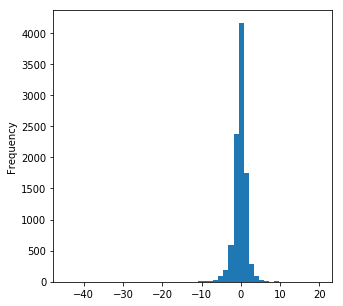

In [60]:
df['forecast_error_diff_deviation'].plot(kind='hist', bins = 50, figsize=(5,5))

In [61]:
df_by_datetime = df[['datetime_gmt', 'forecast_error_diff_deviation',
                                       'pips_agg_25_30_after', 'pips_agg_0_60_after', 'pips_agg_30_240_after']]

df_by_datetime = df_by_datetime.groupby('datetime_gmt', as_index=False).agg({'forecast_error_diff_deviation': 'sum',                                                                                       'pips_agg_25_30_after': 'first',
                                                                                      'pips_agg_0_60_after': 'first',
                                                                                      'pips_agg_30_240_after': 'first'})

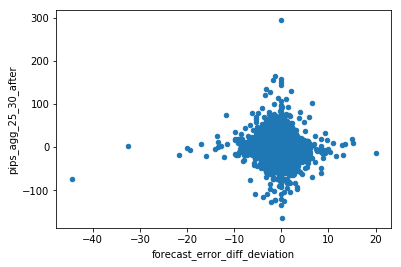

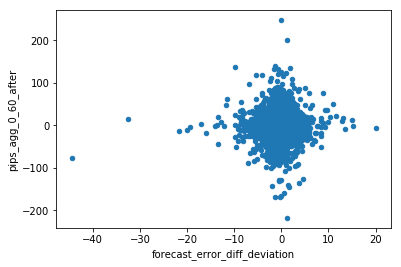

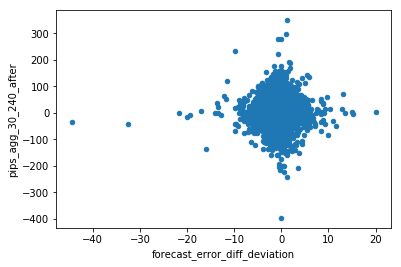

In [62]:
df_by_datetime.plot.scatter(x='forecast_error_diff_deviation', y='pips_agg_25_30_after')
df_by_datetime.plot.scatter(x='forecast_error_diff_deviation', y='pips_agg_0_60_after')
df_by_datetime.plot.scatter(x='forecast_error_diff_deviation', y='pips_agg_30_240_after')

Hmmm, bad news.
My expectation was to see a linear-ish relationship between *forecast_error_diff_deviation* and the corresponding market impact. However, it does not seems to behave like that. Sometimes big deviations do not move the market and the other way around... :-(   
Also, the direction of the deviation has no linear relationship with how the market responds to it. I.e. Positive deviations could move the market in favour of the USD or in favour of EUR.

However, don´t lose the faith yet! It´s important to remember that:

- Not all the news published at the same datatime have the same impact, so it´s likely that we need a smarter grouping criteria with different weights depending on the impact classification.
- It´s also likely that the market could respond differently depending on the new_ID 

So then, what to do next?  Do we remove these outliers or not?

For now, let´s keep them and create the first baseline models to see what degree of accuracy we can get.



Let´s plot the same scatter plot but just for news that were clasiffied by forexfactory as having "High" impact + published in isolation.   
Also, let´s consider *forecast_error_diff_deviation* field, to account for deviations in actual vs forecast but also potential corrections of the previous value.

In [88]:
df_by_datetime = df[df['impact'] == 'High'][['datetime_gmt', 'total_error_diff_deviation','new',
                                       'pips_agg_25_30_after', 'pips_agg_0_60_after', 'pips_agg_30_240_after']]

df_by_datetime = df_by_datetime.groupby('datetime_gmt', as_index=False).agg({'total_error_diff_deviation': 'sum',
                                                                             'new': 'count',
                                                                             'pips_agg_25_30_after': 'first',
                                                                              'pips_agg_0_60_after': 'first',
                                                                              'pips_agg_30_240_after': 'first'})
df_by_datetime = df_by_datetime[df_by_datetime['new'] == 1]

In [89]:
df_by_datetime.head(2)

,datetime_gmt,total_error_diff_deviation,new,pips_agg_25_30_after,pips_agg_0_60_after,pips_agg_30_240_after
0,2007-01-10 13:30:00+00:00,1.0,1,-12,-4,-37
2,2007-01-17 13:30:00+00:00,1.0,1,3,15,40


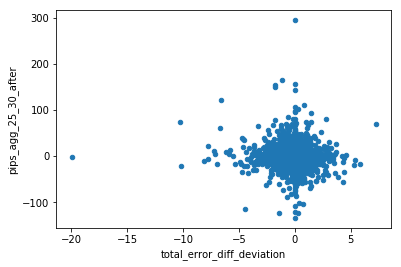

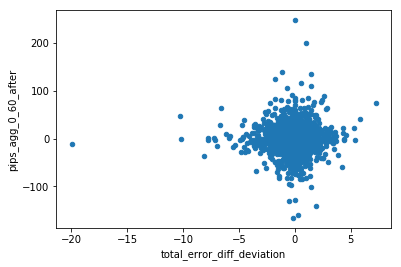

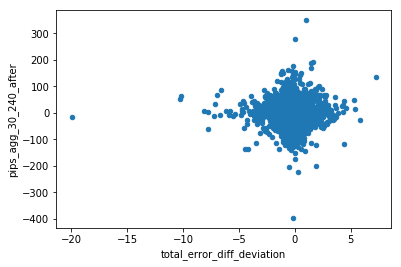

In [90]:
df_by_datetime.plot.scatter(x='total_error_diff_deviation', y='pips_agg_25_30_after')
df_by_datetime.plot.scatter(x='total_error_diff_deviation', y='pips_agg_0_60_after')
df_by_datetime.plot.scatter(x='total_error_diff_deviation', y='pips_agg_30_240_after')

Similar plots... :-(

### Insights on how the publication of macro-economic news affect the market

In [67]:
df_by_datetime = df[['datetime_gmt','pips_candle_max_0_30_after', 'pips_candle_min_0_30_after',
                    'pips_candle_max_0_60_after', 'pips_candle_min_0_60_after',
                     'pips_candle_max_0_120_after', 'pips_candle_min_0_120_after',
                     'pips_candle_max_0_180_after', 'pips_candle_min_0_180_after',
                     'pips_candle_max_0_240_after', 'pips_candle_min_0_240_after',
                    'pips_candle_max_30_60_after', 'pips_candle_min_30_60_after',
                    'pips_candle_max_30_120_after', 'pips_candle_min_30_120_after',
                    'pips_candle_max_30_180_after', 'pips_candle_min_30_180_after',
                    'pips_candle_max_30_240_after', 'pips_candle_min_30_240_after',
                    'pips_candle_max_60_120_after', 'pips_candle_min_60_120_after',
                    'pips_candle_max_60_180_after', 'pips_candle_min_60_180_after',
                    'pips_candle_max_60_240_after', 'pips_candle_min_60_240_after']]

In [68]:
df_by_datetime.head(2)

,datetime_gmt,pips_candle_max_0_30_after,pips_candle_min_0_30_after,pips_candle_max_0_60_after,pips_candle_min_0_60_after,pips_candle_max_0_120_after,pips_candle_min_0_120_after,pips_candle_max_0_180_after,pips_candle_min_0_180_after,pips_candle_max_0_240_after,pips_candle_min_0_240_after,pips_candle_max_30_60_after,pips_candle_min_30_60_after,pips_candle_max_30_120_after,pips_candle_min_30_120_after,pips_candle_max_30_180_after,pips_candle_min_30_180_after,pips_candle_max_30_240_after,pips_candle_min_30_240_after,pips_candle_max_60_120_after,pips_candle_min_60_120_after,pips_candle_max_60_180_after,pips_candle_min_60_180_after,pips_candle_max_60_240_after,pips_candle_min_60_240_after
0,2007-01-08 20:00:00+00:00,3,-6,3,-6,6,-12,11,-12,20,-12,4,-4,8,-10,13,-10,22,-10,6,-12,11,-12,20,-12
1,2007-02-07 20:00:00+00:00,4,-6,7,-6,10,-6,11,-6,17,-6,9,-3,12,-3,13,-3,19,-3,5,-4,6,-4,12,-4


As some news are released exactly at the same datetime, we need to group them

In [69]:
len(df_by_datetime)

9667

In [70]:
df_by_datetime = df_by_datetime.groupby('datetime_gmt', as_index=False).first()


In [71]:
len(df_by_datetime)

6362

In [72]:
df_by_datetime.head(2)

,datetime_gmt,pips_candle_max_0_30_after,pips_candle_min_0_30_after,pips_candle_max_0_60_after,pips_candle_min_0_60_after,pips_candle_max_0_120_after,pips_candle_min_0_120_after,pips_candle_max_0_180_after,pips_candle_min_0_180_after,pips_candle_max_0_240_after,pips_candle_min_0_240_after,pips_candle_max_30_60_after,pips_candle_min_30_60_after,pips_candle_max_30_120_after,pips_candle_min_30_120_after,pips_candle_max_30_180_after,pips_candle_min_30_180_after,pips_candle_max_30_240_after,pips_candle_min_30_240_after,pips_candle_max_60_120_after,pips_candle_min_60_120_after,pips_candle_max_60_180_after,pips_candle_min_60_180_after,pips_candle_max_60_240_after,pips_candle_min_60_240_after
0,2007-01-08 20:00:00+00:00,3,-6,3,-6,6,-12,11,-12,20,-12,4,-4,8,-10,13,-10,22,-10,6,-12,11,-12,20,-12
1,2007-01-09 15:00:00+00:00,7,-2,7,-13,7,-14,12,-14,14,-14,1,-14,2,-15,11,-15,13,-15,5,-12,14,-12,16,-12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1286a36a0>,
      dtype=object)

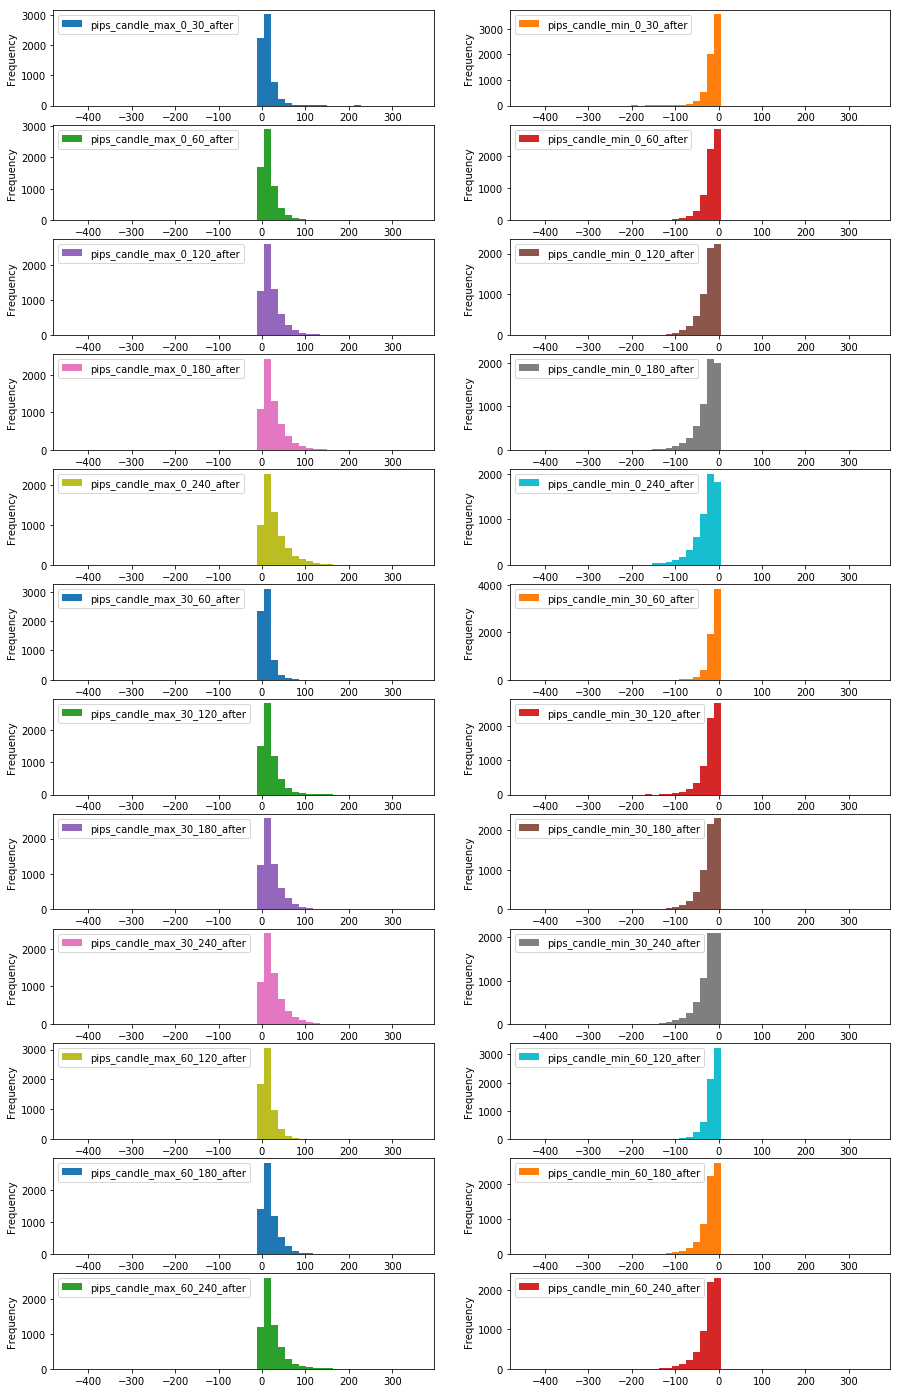

In [73]:
df_by_datetime[df_by_datetime.columns[1:]].plot(kind='hist', subplots=True, bins = 50, sharex=False, layout=(12,2),figsize=(15,25))

In [74]:
df_by_datetime.describe()

,pips_candle_max_0_30_after,pips_candle_min_0_30_after,pips_candle_max_0_60_after,pips_candle_min_0_60_after,pips_candle_max_0_120_after,pips_candle_min_0_120_after,pips_candle_max_0_180_after,pips_candle_min_0_180_after,pips_candle_max_0_240_after,pips_candle_min_0_240_after,pips_candle_max_30_60_after,pips_candle_min_30_60_after,pips_candle_max_30_120_after,pips_candle_min_30_120_after,pips_candle_max_30_180_after,pips_candle_min_30_180_after,pips_candle_max_30_240_after,pips_candle_min_30_240_after,pips_candle_max_60_120_after,pips_candle_min_60_120_after,pips_candle_max_60_180_after,pips_candle_min_60_180_after,pips_candle_max_60_240_after,pips_candle_min_60_240_after
count,6362.00000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000
mean,12.74835,-13.174945,17.325055,-17.631405,23.345017,-23.443728,26.848318,-26.631248,29.679818,-29.091009,11.464162,-11.502672,19.233574,-18.981610,23.313895,-22.745206,26.473279,-25.495756,15.246463,-14.846118,20.119616,-19.374096,23.661270,-22.477994
std,13.83322,14.281615,18.429212,18.668526,24.699036,24.118251,27.821219,27.341554,30.712610,29.648118,12.017557,11.764286,20.461854,19.423206,24.168415,23.250054,27.513870,26.074652,16.180865,15.455503,20.689650,20.242142,24.644343,23.370644
min,-4.00000,-186.000000,-4.000000,-222.000000,-4.000000,-279.000000,-4.000000,-392.000000,-4.000000,-441.000000,-4.000000,-123.000000,-1.000000,-233.000000,-1.000000,-264.000000,-1.000000,-313.000000,-1.000000,-209.000000,-1.000000,-231.000000,-1.000000,-275.000000
25%,4.00000,-17.000000,5.000000,-24.000000,7.000000,-31.000000,8.000000,-36.000000,9.000000,-39.000000,4.000000,-15.000000,6.000000,-25.000000,7.000000,-30.000000,8.000000,-34.000000,5.000000,-20.000000,6.000000,-26.000000,7.000000,-30.000000
50%,8.00000,-9.000000,12.000000,-12.000000,16.000000,-16.000000,19.000000,-18.500000,21.000000,-20.000000,8.000000,-8.000000,13.000000,-13.000000,16.000000,-16.000000,18.000000,-18.000000,11.000000,-10.000000,14.000000,-13.000000,16.000000,-15.000000
75%,17.00000,-4.000000,23.000000,-6.000000,32.000000,-7.000000,37.000000,-8.000000,40.000000,-9.000000,16.000000,-4.000000,26.000000,-6.000000,32.000000,-7.000000,36.000000,-8.000000,20.000000,-5.000000,27.000000,-6.000000,32.000000,-7.000000
max,217.00000,3.000000,279.000000,3.000000,351.000000,3.000000,351.000000,3.000000,356.000000,3.000000,168.000000,1.000000,327.000000,1.000000,327.000000,1.000000,327.000000,1.000000,267.000000,32.000000,267.000000,32.000000,317.000000,32.000000


**Observations**

- For all the considered snapshots, the market impact could be either positive (EUR increasing over USD) or negative (USD increasing over EUR). The max / min pips_variations seems to have a pretty similar scale.

Now, let´s see whether there is a correlation between reaction after 30 min and reaction between 30-60 min

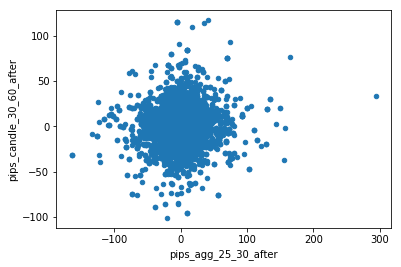

In [75]:
df[['pips_agg_25_30_after', 'pips_candle_30_60_after']].plot.scatter(x='pips_agg_25_30_after', y='pips_candle_30_60_after')

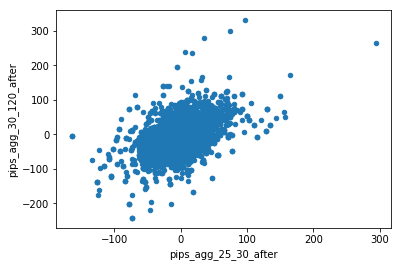

In [76]:
df[['pips_agg_25_30_after', 'pips_agg_30_120_after']].plot.scatter(x='pips_agg_25_30_after', y='pips_agg_30_120_after')

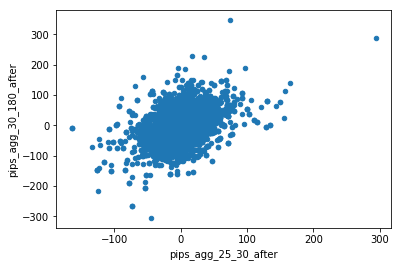

In [77]:
df[['pips_agg_25_30_after', 'pips_agg_30_180_after']].plot.scatter(x='pips_agg_25_30_after', y='pips_agg_30_180_after')

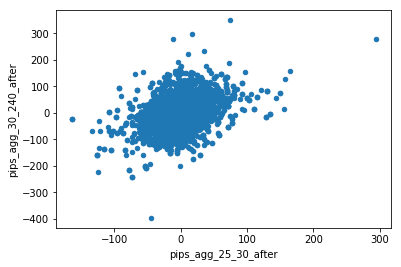

In [78]:
df[['pips_agg_25_30_after', 'pips_agg_30_240_after']].plot.scatter(x='pips_agg_25_30_after', y='pips_agg_30_240_after')

There is not a clear correlation between market reaction after 30 minutes and what will happen later.   
Lot of noise.

------------

### Relationship with the number of outliers in forecast-actual deviations 

First, let´s see how often we do have outliers 

In [79]:
df_pips_by_datetime = df[['datetime_gmt','forecast_error_diff_outlier_class', 'pips_agg_25_30_after', 
                          'pips_agg_0_60_after', 'pips_agg_0_240_after']]

df_pips_by_datetime = df_pips_by_datetime.groupby('datetime_gmt', as_index=False).agg({'forecast_error_diff_outlier_class': 'sum',
                                                                                       'pips_agg_25_30_after': 'first',
                                                                                      'pips_agg_0_60_after': 'first',
                                                                                      'pips_agg_0_240_after': 'first'})




In [80]:
df_pips_by_datetime.head(2)

,datetime_gmt,forecast_error_diff_outlier_class,pips_agg_25_30_after,pips_agg_0_60_after,pips_agg_0_240_after
0,2007-01-08 20:00:00+00:00,0,0,0,17
1,2007-01-09 15:00:00+00:00,0,5,-2,7


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


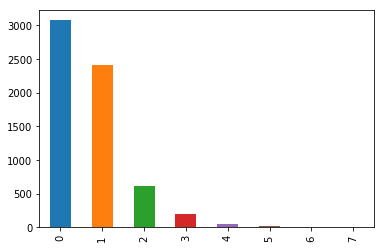

In [81]:
df_temp = df_pips_by_datetime[['forecast_error_diff_outlier_class']]
df_temp['ocurrences'] = 1
df_temp = df_temp.groupby('forecast_error_diff_outlier_class').sum().reset_index()
df_temp['ocurrences'].plot(kind='bar')

The frecuency of outliers in the deviation between forecast and actual values is indeed pretty low.   
However, there is a good number of times where the actual value diverge more than expected from the forecasted one. i.e. out of the Q3 - Q1 range.

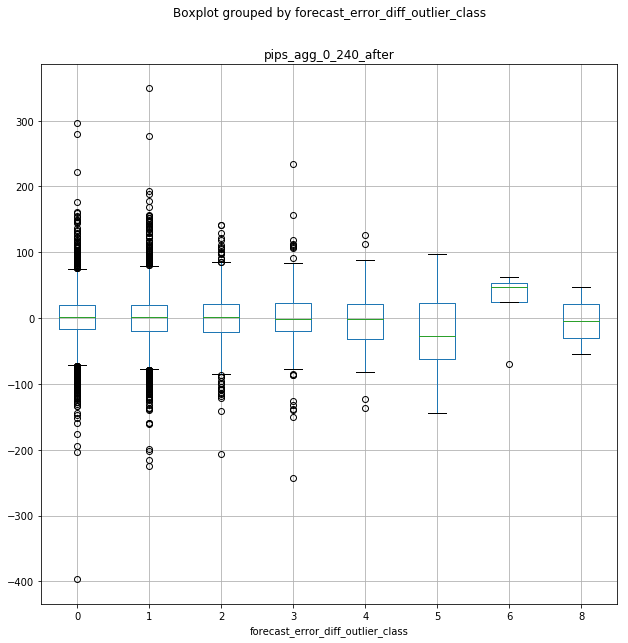

In [82]:
df_pips_by_datetime.boxplot(column='pips_agg_0_240_after', by='forecast_error_diff_outlier_class',
                           figsize=(10,10))


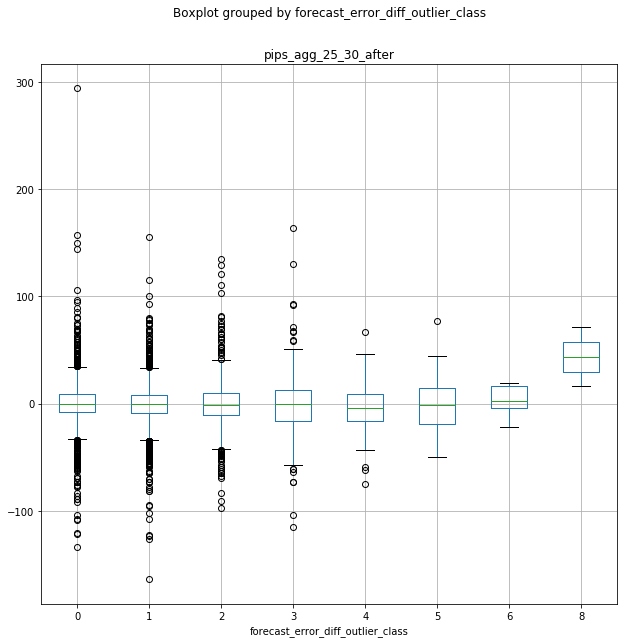

In [83]:
df_pips_by_datetime.boxplot(column='pips_agg_25_30_after', by='forecast_error_diff_outlier_class',
                           figsize=(10,10))



This analysis is not very accurate because of two reasons:

- The number of datapoints used for each boxplot is different. Most of the datapoints felt into "0" and "1"
- We have just summed up all the values without weighting them by the 'impact' category of the new. I.e. a high deviation in a new classified as having "High" impact should move the market more than a high deviation in a new classified as "Low"  

However, it seems that having more outliers seems to impact the market more.

### Correlation matrix

Let´s see the correlation between features extracted from forexFactory and market impact.

In [84]:
columns_of_interest = [
 'actual',
 'forecast',
 'forecast_error',
 'impact',
 'new',
 'previous',
 'previous_error',
 'week',
 'forecast_error_diff',
 'year',
 'quarter',
 'month',
 'weekday',
 'volatility_0_30_after',
 'pips_candle_0_30_after',
 'pips_agg_0_30_after',
 'pips_candle_max_0_30_after',
 'pips_candle_min_0_30_after',
 'volatility_0_60_after',
 'pips_candle_0_60_after',
 'pips_agg_0_60_after',
 'pips_candle_max_0_60_after',
 'pips_candle_min_0_60_after',
 'volatility_30_120_after',
 'pips_candle_30_120_after',
 'pips_agg_30_120_after',
 'pips_candle_max_30_120_after',
 'pips_candle_min_30_120_after',
 'volatility_30_180_after',
 'pips_candle_30_180_after',
 'pips_agg_30_180_after',
 'pips_candle_max_30_180_after',
 'pips_candle_min_30_180_after',
 'volatility_30_240_after',
 'pips_candle_30_240_after',
 'pips_agg_30_240_after',
 'pips_candle_max_30_240_after',
 'pips_candle_min_30_240_after',
 'previous_value',
 'previous_error_diff',
 'total_error_diff',
 'forecast_error_diff_outlier_class',
 'forecast_error_diff_deviation',
 'previous_error_diff_outlier_class',
 'previous_error_diff_deviation',
 'total_error_diff_outlier_class',
 'total_error_diff_deviation']

In [85]:
correlation_matrix = df[columns_of_interest].corr()

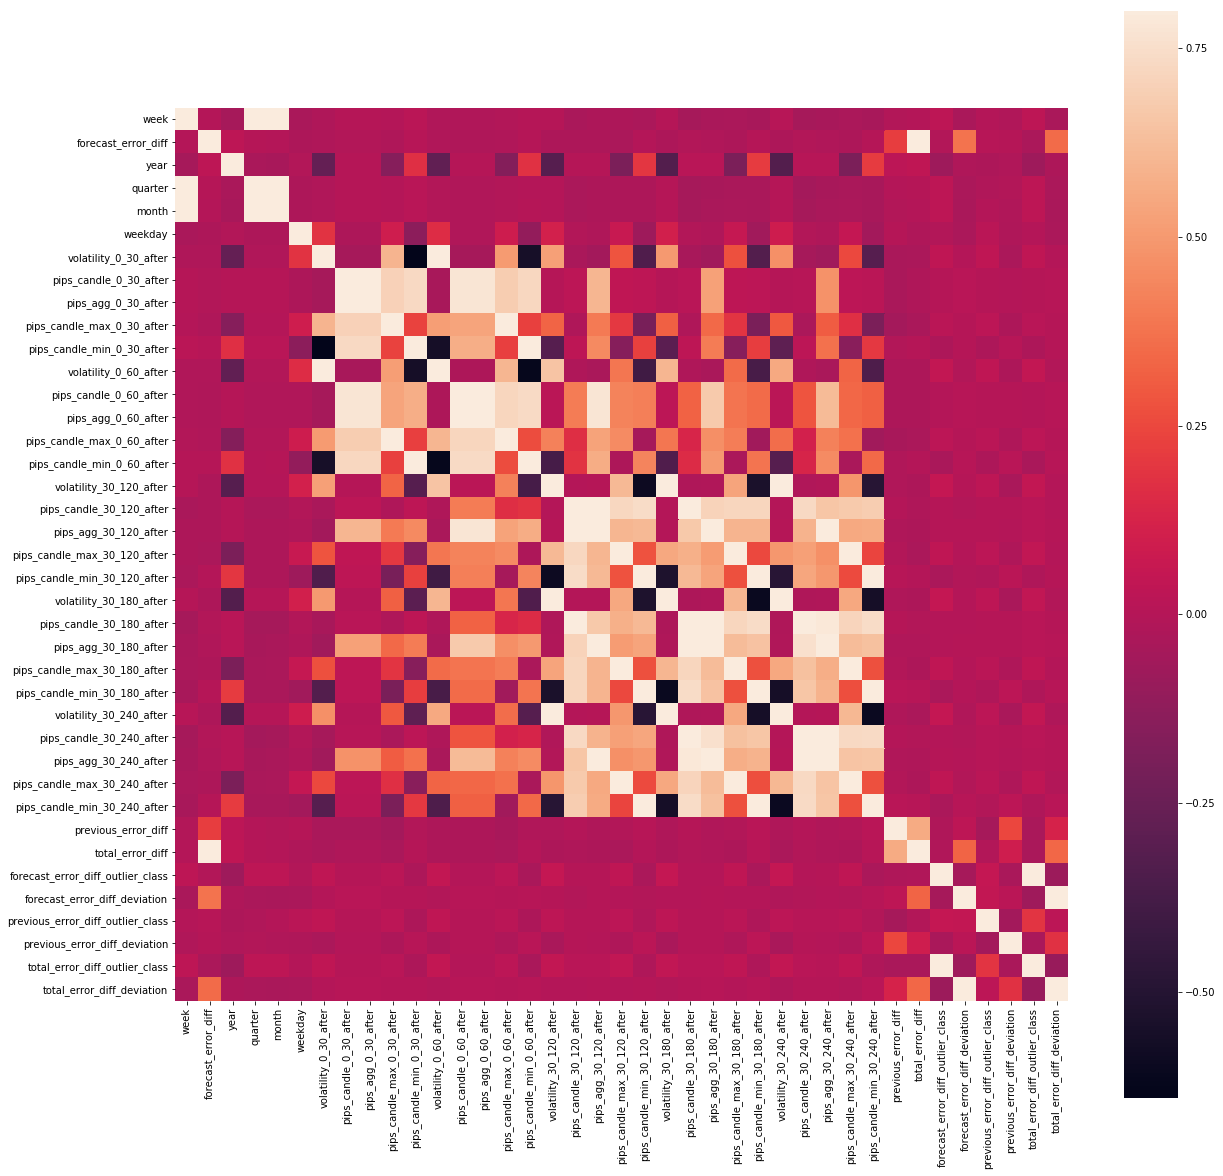

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix, vmax=.8, square=True);

Two observations:

- Any of the individual features extracted from ForexFactory seems to have a high correlation with the market reaction. 
Interesting to see those red boxes between *weekday* and *pips_candle_max_0_30_after* / *pips_candle_max_0_60_after* / *pips_candle_max_0_120_after* 

- As expected, what the market will do in the future is highly correlated with what it did in the recent past. See *pips_candle_max_0_120_after* with *pips_candle_max_0_240_after* or *pips_candle_max_0_60_after*

In [87]:
# Let´s zoom on pips_candle_max_0_240_after
k = 20 
cols = correlation_matrix.nlargest(k, 'pips_candle_max_0_240_after')['pips_candle_max_0_240_after'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

KeyError: 'pips_candle_max_0_240_after'